# Spam Classifier

### Importation

In [1]:
import csv
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.neural_network import MLPClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tilak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tilak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading file

In [2]:
file = open("spam.csv")
csvreader = csv.reader(file)
header = next(csvreader)
print(header)
rows = []
for row in csvreader:
    rows.append(row)
# Printing first 10 examples.
print(rows[: 10])
file.close()

['v1', 'v2', '', '', '']
[['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', '', '', ''], ['ham', 'Ok lar... Joking wif u oni...', '', '', ''], ['spam', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", '', '', ''], ['ham', 'U dun say so early hor... U c already then say...', '', '', ''], ['ham', "Nah I don't think he goes to usf, he lives around here though", '', '', ''], ['spam', "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv", '', '', ''], ['ham', 'Even my brother is not like to speak with me. They treat me like aids patent.', '', '', ''], ['ham', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertu

### Tokenization and stemming

In [3]:
fdist = FreqDist()
pst = PorterStemmer()
stopwords = set(stopwords.words('english'))
for i in range(len(rows)):
    tokens = word_tokenize(rows[i][1])
    for word in tokens:
        word.lower()
        if word not in stopwords and word.isalpha():
            fdist[pst.stem(word)] += 1
# Printing 30 most common words in the email body.
fdist.most_common(30)

[('i', 1956),
 ('u', 1133),
 ('call', 656),
 ('go', 451),
 ('get', 445),
 ('ur', 381),
 ('you', 340),
 ('gt', 318),
 ('lt', 316),
 ('come', 300),
 ('free', 278),
 ('know', 274),
 ('ok', 266),
 ('like', 257),
 ('love', 251),
 ('got', 249),
 ('time', 247),
 ('want', 244),
 ('good', 242),
 ('day', 242),
 ('text', 225),
 ('it', 206),
 ('send', 205),
 ('no', 192),
 ('need', 185),
 ('one', 184),
 ('txt', 182),
 ('how', 177),
 ('today', 173),
 ('see', 172)]

### Selecting the most common words

In [4]:
most_common = []
for (i,j) in fdist.most_common(500):
    most_common.append(i)
print(most_common)

['i', 'u', 'call', 'go', 'get', 'ur', 'you', 'gt', 'lt', 'come', 'free', 'know', 'ok', 'like', 'love', 'got', 'time', 'want', 'good', 'day', 'text', 'it', 'send', 'no', 'need', 'one', 'txt', 'how', 'today', 'see', 'take', 'think', 'home', 'lor', 'r', 'repli', 'sorri', 'stop', 'tell', 'still', 'back', 'do', 'mobil', 'n', 'make', 'but', 'if', 'we', 'hi', 'da', 'what', 'phone', 'new', 'say', 'dont', 'pleas', 'work', 'later', 'so', 'week', 'ask', 'hope', 'just', 'miss', 'pl', 'my', 'meet', 'the', 'your', 'night', 'messag', 'wait', 'happi', 'dear', 'well', 'that', 'great', 'claim', 'thing', 'tri', 'wat', 'k', 'give', 'much', 'and', 'c', 'oh', 'number', 'na', 'hey', 'friend', 'thank', 'have', 'way', 'msg', 'thi', 'a', 'now', 'prize', 'right', 'ye', 'feel', 'let', 'to', 'wan', 'even', 'alreadi', 'pick', 'are', 'tomorrow', 'said', 'yeah', 'can', 'min', 'realli', 'amp', 'leav', 'babe', 'care', 'is', 'im', 'co', 'would', 'e', 'win', 'last', 'morn', 'sleep', 'sure', 'servic', 'use', 'keep', 'cash

### features scaling

In [5]:
def scaling(st):
    tokens = word_tokenize(st)
    stemmed = []
    for token in tokens:
        stemmed.append(pst.stem(token.lower()))
    return stemmed

In [6]:
temprow = []
for i in range(len(rows)):
    temprow.append(scaling(rows[i][1]))
# Printing first 10 examples tokenized.
print(temprow[: 10])

[['go', 'until', 'jurong', 'point', ',', 'crazi', '..', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amor', 'wat', '...'], ['ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...'], ['free', 'entri', 'in', '2', 'a', 'wkli', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', '.', 'text', 'fa', 'to', '87121', 'to', 'receiv', 'entri', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'appli', '08452810075over18', "'s"], ['u', 'dun', 'say', 'so', 'earli', 'hor', '...', 'u', 'c', 'alreadi', 'then', 'say', '...'], ['nah', 'i', 'do', "n't", 'think', 'he', 'goe', 'to', 'usf', ',', 'he', 'live', 'around', 'here', 'though'], ['freemsg', 'hey', 'there', 'darl', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'i', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'tb', 'ok', '!', 'xxx', 'std', 'chg', 'to', 'send', ',', 'å£1.50', 'to', 'rcv'], ['even', '

### Getting features

In [7]:
def getFeatures(arr , most_common):
    fe = []
    for word in most_common:
        if word in arr:
            fe.append(1)
        else:
            fe.append(0)
    return fe

In [8]:
X = []
for i in range(len(temprow)):
    a = getFeatures(temprow[i] , most_common)
    X.append(a)
#Printing feature vectors of first 5 examples.
print(X[: 5])

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### Getting target

In [9]:
y = []
for i in range(len(rows)):
    if rows[i][0] == 'ham':
        y.append(0)
    else:
        y.append(1)
# Printing first 10 target example.
print(y[: 10])


[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]


### Splitting dataset into train and test

In [10]:
X = np.array(X)
y = np.array(y)
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 500)
(1115, 500)
(4457,)
(1115,)


### Model

#### Logistic Regression

In [11]:
clf = LogisticRegression()
clf.fit(X_train , y_train)


LogisticRegression()

#### Naive Bayes

In [12]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

#### Neural Network

In [13]:
nn = MLPClassifier(solver = 'adam' , activation = 'relu' , hidden_layer_sizes = (50 , 50))
nn.fit(X_train , y_train)

MLPClassifier(hidden_layer_sizes=(50, 50))

### Prediction

In [14]:
pred1 = clf.predict(X_test)
pred2 = nn.predict(X_test)
pred3 = gnb.predict(X_test)
# Checking first 50 predictions.
print("Predicted (Logistic regression): " , pred1[: 50])
print("Predicted (Multilayer perceptron): " , pred2[: 50])
print("Predicted (Naive Bayes): " , pred3[: 50])
print("Real: " , y_test[: 50])

Predicted (Logistic regression):  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0]
Predicted (Multilayer perceptron):  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0]
Predicted (Naive Bayes):  [1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 0 1 0 0 1 0 1 1]
Real:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0]


### Confusion matrix

In [15]:
print("Confusion matrix for: ")
print("Logistic: ")
print(confusion_matrix(y_test , pred1))
print("MLP: ")
print(confusion_matrix(y_test , pred2))
print("Naive Bayes: ")
print(confusion_matrix(y_test , pred3))

Confusion matrix for: 
Logistic: 
[[960   3]
 [ 23 129]]
MLP: 
[[958   5]
 [ 11 141]]
Naive Bayes: 
[[598 365]
 [  7 145]]


### F1 score

In [16]:
print("F1 scores of: ")
f1 = f1_score(y_test, pred1, average='weighted')
f2 = f1_score(y_test, pred2, average='weighted')
f3 = f1_score(y_test, pred3, average='weighted')
print("Logistic: " , f1)
print("MLP" , f2)
print("Naive Bayes" , f3)

F1 scores of: 
Logistic:  0.9759803716969041
MLP 0.985528045645734
Naive Bayes 0.7184926152325913


### Plotting f1

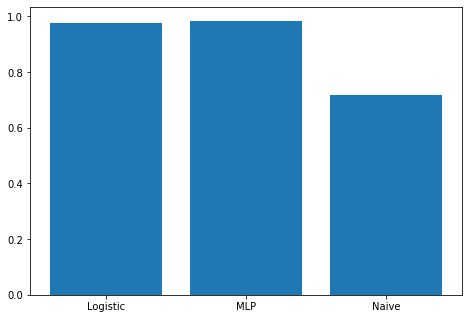

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Logistic', 'MLP', 'Naive']
students = [f1 , f2 , f3]
ax.bar(langs,students)
plt.show()

#### MultiLayer Perceptron selected 

### Taking input

In [21]:
st = input("Enter your Email body: ")

Enter your Email body: Order kijiye, special offer laye hai


### Data Preprocessing

In [22]:
stemmed_st = scaling(st)
x_in = getFeatures(stemmed_st, most_common)
print(x_in)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Ham or Spam

In [23]:
predicted = nn.predict([x_in])
if predicted == 0:
    print("ham")
else:
    print("spam")

ham
